In [85]:
import numpy as np
import torch.nn as nn
import torch
import matplotlib.pyplot as plt


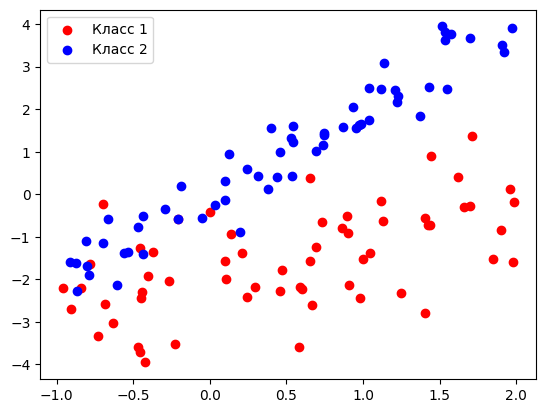

In [86]:
num_points = 60
x_class1 = np.random.uniform(-1, 2, num_points)
y_class1 = 1 * x_class1 + np.random.normal(0, 1, num_points) - 2

x_class2 = np.random.uniform(-1, 2, num_points)
y_class2 = 2 * x_class2 + np.random.normal(0, 0.5, num_points)

# Объединение точек
class1_points = np.column_stack((x_class1, y_class1))
class2_points = np.column_stack((x_class2, y_class2))

# Создание меток для точек
class1_labels = np.zeros(num_points)
class2_labels = np.ones(num_points)

points = torch.tensor(np.concatenate((class1_points, class2_points), axis=0), dtype=torch.float)
labels = torch.tensor(np.concatenate((class1_labels, class2_labels), axis=0), dtype=torch.float)

def draw():
    plt.scatter(class1_points[:, 0], class1_points[:, 1], c='r', label='Класс 1')
    plt.scatter(class2_points[:, 0], class2_points[:, 1], c='b', label='Класс 2')
    plt.legend()
    plt.show()

draw()


In [95]:

class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

    def plot_hyperplane(self):
    
        w = self.fc.weight.data.numpy()
        b = self.fc.bias.data.numpy()
    
        x = np.linspace(-0.5, 1.5, 100)
        y = (-w[0][0] * x - b) / w[0][1]
        plt.plot(x, y, '-r')
        plt.title('Разделяющая гиперплоскость')
        plt.show()

    def plot_classification(self, points):
        with torch.no_grad():
            predicted_labels = self.forward(points).squeeze().numpy()
            
        w = self.fc.weight.data.numpy()
        b = self.fc.bias.data.numpy()
    
        x = np.linspace(min(points[:, 0]), max(points[:, 0]), 100)
        y = (-w[0][0] * x - b) / w[0][1]
        plt.plot(x, y, '-r')

        plt.scatter(points[:, 0], points[:, 1], c=predicted_labels > 0.5 , cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Классификация точек')
        plt.show()



In [96]:
perceptron = Perceptron(2)

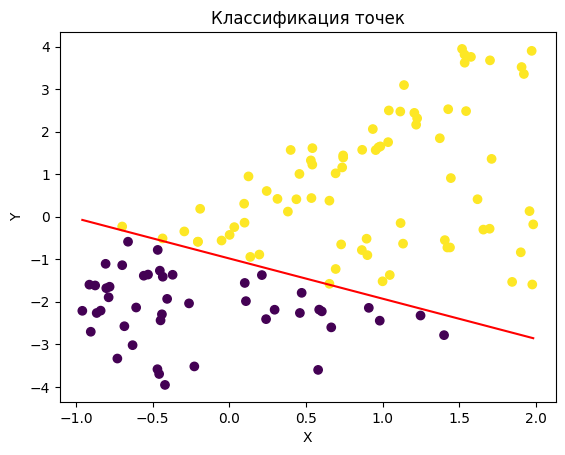

In [97]:
perceptron.plot_classification(points)

In [98]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, points, labels):
        self.points = points
        self.labels = labels

    def __len__(self):
        return len(self.points)

    def __getitem__(self, idx):
        return self.points[idx], self.labels[idx]

custom_dataset = CustomDataset(points, labels)


# Создаем даталоадер
batch_size = 10  # Размер пакета
data_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

In [99]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)

In [100]:
from tqdm import tqdm

def calculate_accuracy(outputs, labels):
    correct = (outputs > 0.5).squeeze().long() == labels.long()
    accuracy = correct.sum().item() / labels.size(0)
    return accuracy

def train_model(model, criterion, optimizer, train_loader, epochs=10):
    for epoch in range(epochs):
        loss_val = 0.0
        acc_val = 0.0
        for data in (pbar :=  tqdm(train_loader)):
            points, labels = data
            
            optimizer.zero_grad()
            outputs = perceptron(points)
            loss = criterion(outputs.view(-1), labels)
            
            loss_item = loss.item()
            loss_val += loss_item
            
            acc_current = calculate_accuracy(outputs,labels)
            acc_val += acc_current
            
            loss.backward() 
            optimizer.step()

            pbar.set_description(f' epoch : {epoch}\t loss: {loss_item:.5f}\t train accuracy: {acc_current:.3f}')
    
        print(f" mid loss : {loss_val/len(train_loader):.5f}")
        print(f" accuracy : {acc_val/len(train_loader):.5f}")

# Пример вызова функции обучения
train_model(perceptron, criterion, optimizer, data_loader, 35)

 epoch : 0	 loss: 0.37257	 train accuracy: 0.900: 100%|███████████████████████████████| 12/12 [00:00<00:00, 242.74it/s]


 mid loss : 0.53658
 accuracy : 0.70833


 epoch : 1	 loss: 0.53611	 train accuracy: 0.800: 100%|███████████████████████████████| 12/12 [00:00<00:00, 317.81it/s]


 mid loss : 0.46956
 accuracy : 0.76667


 epoch : 2	 loss: 0.33040	 train accuracy: 0.900: 100%|███████████████████████████████| 12/12 [00:00<00:00, 165.76it/s]


 mid loss : 0.43597
 accuracy : 0.79167


 epoch : 3	 loss: 0.54393	 train accuracy: 0.700: 100%|███████████████████████████████| 12/12 [00:00<00:00, 304.45it/s]


 mid loss : 0.41441
 accuracy : 0.81667


 epoch : 4	 loss: 0.56712	 train accuracy: 0.800: 100%|███████████████████████████████| 12/12 [00:00<00:00, 345.19it/s]


 mid loss : 0.39649
 accuracy : 0.83333


 epoch : 5	 loss: 0.29013	 train accuracy: 0.900: 100%|███████████████████████████████| 12/12 [00:00<00:00, 333.44it/s]


 mid loss : 0.38090
 accuracy : 0.84167


 epoch : 6	 loss: 0.36580	 train accuracy: 0.900: 100%|███████████████████████████████| 12/12 [00:00<00:00, 303.73it/s]


 mid loss : 0.36732
 accuracy : 0.84167


 epoch : 7	 loss: 0.55736	 train accuracy: 0.600: 100%|███████████████████████████████| 12/12 [00:00<00:00, 321.47it/s]


 mid loss : 0.35692
 accuracy : 0.83333


 epoch : 8	 loss: 0.33216	 train accuracy: 0.800: 100%|███████████████████████████████| 12/12 [00:00<00:00, 273.31it/s]


 mid loss : 0.34572
 accuracy : 0.84167


 epoch : 9	 loss: 0.32677	 train accuracy: 0.900: 100%|███████████████████████████████| 12/12 [00:00<00:00, 230.64it/s]


 mid loss : 0.33655
 accuracy : 0.85000


 epoch : 10	 loss: 0.37608	 train accuracy: 0.900: 100%|██████████████████████████████| 12/12 [00:00<00:00, 226.44it/s]


 mid loss : 0.32919
 accuracy : 0.85833


 epoch : 11	 loss: 0.14811	 train accuracy: 1.000: 100%|██████████████████████████████| 12/12 [00:00<00:00, 251.19it/s]


 mid loss : 0.32190
 accuracy : 0.85000


 epoch : 12	 loss: 0.30332	 train accuracy: 0.900: 100%|██████████████████████████████| 12/12 [00:00<00:00, 342.11it/s]


 mid loss : 0.31454
 accuracy : 0.86667


 epoch : 13	 loss: 0.34918	 train accuracy: 0.800: 100%|██████████████████████████████| 12/12 [00:00<00:00, 348.51it/s]


 mid loss : 0.30825
 accuracy : 0.86667


 epoch : 14	 loss: 0.29693	 train accuracy: 0.900: 100%|██████████████████████████████| 12/12 [00:00<00:00, 298.29it/s]


 mid loss : 0.30276
 accuracy : 0.86667


 epoch : 15	 loss: 0.51198	 train accuracy: 0.600: 100%|██████████████████████████████| 12/12 [00:00<00:00, 328.76it/s]


 mid loss : 0.29796
 accuracy : 0.86667


 epoch : 16	 loss: 0.30866	 train accuracy: 0.800: 100%|██████████████████████████████| 12/12 [00:00<00:00, 326.65it/s]


 mid loss : 0.29256
 accuracy : 0.86667


 epoch : 17	 loss: 0.45937	 train accuracy: 0.800: 100%|██████████████████████████████| 12/12 [00:00<00:00, 339.89it/s]


 mid loss : 0.28852
 accuracy : 0.86667


 epoch : 18	 loss: 0.30348	 train accuracy: 0.800: 100%|██████████████████████████████| 12/12 [00:00<00:00, 322.19it/s]


 mid loss : 0.28483
 accuracy : 0.86667


 epoch : 19	 loss: 0.42185	 train accuracy: 0.800: 100%|██████████████████████████████| 12/12 [00:00<00:00, 343.60it/s]


 mid loss : 0.28058
 accuracy : 0.87500


 epoch : 20	 loss: 0.31525	 train accuracy: 0.800: 100%|██████████████████████████████| 12/12 [00:00<00:00, 353.16it/s]


 mid loss : 0.27871
 accuracy : 0.87500


 epoch : 21	 loss: 0.24048	 train accuracy: 1.000: 100%|██████████████████████████████| 12/12 [00:00<00:00, 333.88it/s]


 mid loss : 0.27540
 accuracy : 0.88333


 epoch : 22	 loss: 0.16619	 train accuracy: 1.000: 100%|██████████████████████████████| 12/12 [00:00<00:00, 361.01it/s]


 mid loss : 0.27181
 accuracy : 0.88333


 epoch : 23	 loss: 0.28434	 train accuracy: 0.800: 100%|██████████████████████████████| 12/12 [00:00<00:00, 352.28it/s]


 mid loss : 0.26912
 accuracy : 0.87500


 epoch : 24	 loss: 0.12966	 train accuracy: 1.000: 100%|██████████████████████████████| 12/12 [00:00<00:00, 334.65it/s]


 mid loss : 0.26698
 accuracy : 0.88333


 epoch : 25	 loss: 0.12273	 train accuracy: 1.000: 100%|██████████████████████████████| 12/12 [00:00<00:00, 197.78it/s]


 mid loss : 0.26440
 accuracy : 0.88333


 epoch : 26	 loss: 0.27599	 train accuracy: 0.900: 100%|██████████████████████████████| 12/12 [00:00<00:00, 456.59it/s]


 mid loss : 0.26214
 accuracy : 0.88333


 epoch : 27	 loss: 0.21514	 train accuracy: 0.900: 100%|██████████████████████████████| 12/12 [00:00<00:00, 462.26it/s]


 mid loss : 0.25967
 accuracy : 0.88333


 epoch : 28	 loss: 0.44484	 train accuracy: 0.700: 100%|██████████████████████████████| 12/12 [00:00<00:00, 358.63it/s]


 mid loss : 0.25834
 accuracy : 0.88333


 epoch : 29	 loss: 0.47110	 train accuracy: 0.800: 100%|██████████████████████████████| 12/12 [00:00<00:00, 249.64it/s]


 mid loss : 0.25648
 accuracy : 0.88333


 epoch : 30	 loss: 0.10857	 train accuracy: 1.000: 100%|██████████████████████████████| 12/12 [00:00<00:00, 250.75it/s]


 mid loss : 0.25476
 accuracy : 0.90000


 epoch : 31	 loss: 0.28303	 train accuracy: 0.900: 100%|██████████████████████████████| 12/12 [00:00<00:00, 256.81it/s]


 mid loss : 0.25340
 accuracy : 0.90000


 epoch : 32	 loss: 0.12401	 train accuracy: 1.000: 100%|██████████████████████████████| 12/12 [00:00<00:00, 239.01it/s]


 mid loss : 0.25095
 accuracy : 0.89167


 epoch : 33	 loss: 0.28136	 train accuracy: 0.900: 100%|██████████████████████████████| 12/12 [00:00<00:00, 256.21it/s]


 mid loss : 0.25057
 accuracy : 0.87500


 epoch : 34	 loss: 0.14506	 train accuracy: 1.000: 100%|██████████████████████████████| 12/12 [00:00<00:00, 253.02it/s]


 mid loss : 0.24875
 accuracy : 0.90000


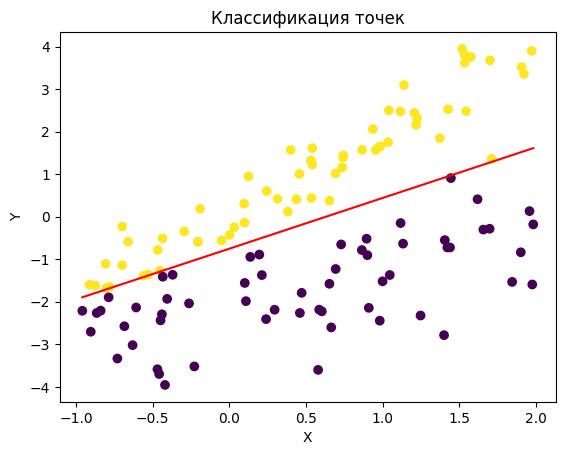

In [101]:
perceptron.plot_classification(points)

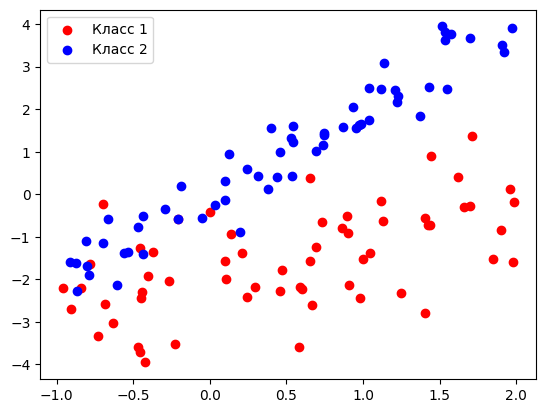

In [102]:
draw()